### Two Populations Comparative Statistical Analysis

This notebook explores the differences between two populations: patients with breast cancer and those without. We have a sample of 357 patients without cancer and 212 patients with cancer consisting of 30 key variables that may help distinguish __. We will utilize hypothesis testing to see whether the two groups do indeed differ in and that it is not due to chance. 

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from diagnosis.twosample import plt_by_diagnosis, two_sample_t_test

In [2]:
dat = pd.read_csv('../data/clean.csv')
dat_ = dat.iloc[:, 1:]
dat.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
dat.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
dat__diagnosis_mean = dat_.groupby("diagnosis").mean()
dat__diagnosis_mean

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0.0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1.0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [5]:
dat__diagnosis_std = dat_.groupby("diagnosis").std()
dat__diagnosis_std

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0.0,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
1.0,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553


In [6]:
dat__diagnosis_mean.loc["diff"] = dat__diagnosis_mean.loc[0] - dat__diagnosis_mean.loc[1] 
dat__diagnosis_mean

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0.0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1.0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
diff,-5.316306,-3.690144,-37.289971,-515.586219,-0.010421,-0.065103,-0.114717,-0.062273,-0.018723,0.000187,...,-7.755010,-5.803138,-54.364392,-863.386881,-0.019886,-0.192152,-0.284368,-0.107793,-0.053222,-0.012088


In [7]:
min_diff, max_diff = dat__diagnosis_mean.loc["diff"].min(), dat__diagnosis_mean.loc["diff"].max()

In [8]:
dat__diagnosis_mean.columns[dat__diagnosis_mean.loc["diff"] == min_diff][0]

'area_worst'

In [9]:
dat__diagnosis_mean.columns[dat__diagnosis_mean.loc["diff"] == max_diff][0]

'texture_se'

In [10]:
dat__diagnosis_mean["area_worst"]

diagnosis
0.0      558.899440
1.0     1422.286321
diff    -863.386881
Name: area_worst, dtype: float64

In [11]:
dat__diagnosis_std["area_worst"]

diagnosis
0.0    163.601424
1.0    597.967743
Name: area_worst, dtype: float64

In [12]:
dat__diagnosis_mean["texture_se"]

diagnosis
0.0     1.220380
1.0     1.210915
diff    0.009465
Name: texture_se, dtype: float64

In [13]:
dat__diagnosis_std["texture_se"]

diagnosis
0.0    0.589180
1.0    0.483178
Name: texture_se, dtype: float64

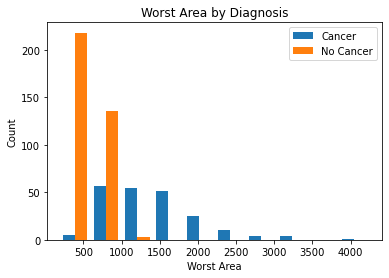

In [14]:
plt_by_diagnosis(dat, "area_worst", "Worst Area")

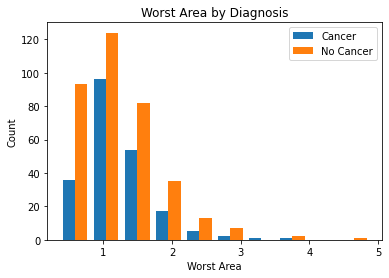

In [15]:
plt_by_diagnosis(dat, "texture_se", "Worst Area")

In [16]:
dat_0 = dat.loc[dat["diagnosis"] == 0]
dat_1 = dat.loc[dat["diagnosis"] == 1]

In [17]:
two_sample_t_test(dat, "diagnosis", "area_worst", False)

Fail to Reject Null Hypohesis


Ttest_indResult(statistic=nan, pvalue=nan)

In [18]:
two_sample_t_test(dat, "diagnosis", "texture_se", True)

Fail to Reject Null Hypohesis


Ttest_indResult(statistic=nan, pvalue=nan)